Import all the necessary libraries as:

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

Given below is the code for the implementation of the Linear Regression Model. We assume that the parameters to the model are in the form of panda tables.

In [8]:
class LinRegression:

    def __init__(self,lr=0.01,iter=1000,err_limit = 10**-3):
        self.lr = lr
        self.iter = iter
        self.err_limit = err_limit

    def add_const_row(self,X):
        if 'const' not in X:
            c = np.ones(X.shape[0])
            X.insert(0,'const',c)
        return np.array(X)
    

    def train(self,X_train,Y_train):
        X_train = self.add_const_row(X_train)
        self.num_feat = X_train.shape[0]
        self.num_col = X_train.shape[1]
        self.beta = np.ones(self.num_col)
        self.xmean=[]
        self.xstd=[]
        self.ymean=np.mean(Y_train)
        self.ystd = np.std(Y_train)

        self.error = []
        X_train = np.transpose(X_train)
        for i in range(1,self.num_col):
            self.xmean.append(np.mean(X_train[i]))
            self.xstd.append(np.std(X_train[i]))

        for i in range(1,self.num_col):
            X_train[i] = (X_train[i] - self.xmean[i-1])/self.xstd[i-1]
        Y_train = (Y_train - self.ymean)/self.ystd

        for i in range(self.iter):
            err = np.dot(np.transpose(X_train),self.beta)-Y_train
            e = np.mean(err**2)
            self.error.append(e)

            if (e<self.err_limit):
                break

            der = np.dot(X_train,err)/self.num_feat
            self.beta = self.beta - self.lr*der           

        return self.beta,self.error

    
    def predict(self,X_test):
        X_test = self.add_const_row(X_test)
        X_test = np.transpose(X_test)
        for i in range(1,X_test.shape[0]):
            X_test[i] = (X_test[i] - self.xmean[i-1])/self.xstd[i-1]
        out = np.dot(np.transpose(X_test),self.beta)
        out = out*self.ystd + self.ymean
        return out
        

Now, we shall focus on building the training and test datasets for predicting and using the model.

In [9]:
df = pd.read_csv("Medical Price Dataset.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now, lets look at cleaning up the data.

In [11]:
Y = df.charges.values
df = df.drop('charges',axis=1)

df.sex = df.sex.replace('female',1)
df.sex = df.sex.replace('male',0)

df.smoker = df.smoker.replace('yes',1)
df.smoker = df.smoker.replace('no',0)

df.region = df.region.replace('northeast',0)
df.region = df.region.replace('northwest',1)
df.region = df.region.replace('southeast',2)
df.region = df.region.replace('southwest',3)

In [12]:
df

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,1
4,32,0,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1
1334,18,1,31.920,0,0,0
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


In [13]:
Y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

We shall be using the builtin function train_test_split() from the sklearn library to split our datasets into the ones for training and testing. This can also be done by playing around with the random function but because of the time crunch I'm going with the later one.

In [10]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(df,Y,test_size=0.25,random_state=18)

In [18]:
X_train = X_train.reset_index()
X_test = X_test.reset_index()
X_train = X_train.drop('index',axis=1)
X_test = X_test.drop('index',axis=1)

In [26]:
X_train = X_train.drop('level_0',axis=1)
X_test = X_test.drop('level_0',axis=1)

In [29]:
X_train

,age,sex,bmi,children,smoker,region
0,43,1,29.900,1,0,3
1,22,0,19.950,3,0,0
2,64,0,38.190,0,0,0
3,20,1,31.790,2,0,2
4,42,0,35.800,2,0,3
...,...,...,...,...,...,...
998,40,0,29.355,1,0,1
999,56,1,28.310,0,0,0
1000,50,0,32.300,2,0,3
1001,47,1,26.600,2,0,0


In [30]:
X_test

,age,sex,bmi,children,smoker,region
0,55,0,30.685,0,1,0
1,35,0,36.670,1,1,0
2,45,1,28.600,2,0,2
3,27,0,42.130,0,1,2
4,64,1,31.300,2,1,3
...,...,...,...,...,...,...
330,18,0,34.430,0,0,2
331,18,1,28.215,0,0,0
332,41,0,29.640,5,0,0
333,34,0,42.130,2,0,2


With the given data, one can play around with different columns and see how the data is being distributed over the plane. For instance - 

<AxesSubplot:xlabel='bmi', ylabel='age'>

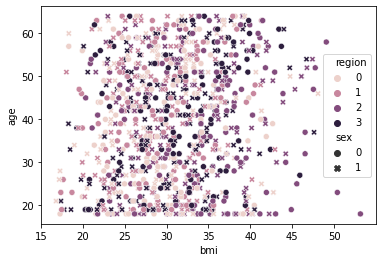

In [22]:
sns.scatterplot(data=X_train,x='bmi',y='age',hue='region',style='sex')

We see that bmi and age are very widely sparsed out meaning that their correlation is nowhere near to 1.

Now, lets shift back our aim towards getting our output.

In [31]:
Model = LinRegression()

In [32]:
beta, error = Model.train(X_train,Y_train)

In [33]:
beta

array([ 4.31712474e-05,  3.07186611e-01, -5.34518786e-03,  1.51475281e-01,
        5.64867600e-02,  7.92534941e-01, -2.76093884e-02])

In [35]:
len(error)

1000

Let us attempt to plot this error vs the number of iterations and see how our Gradient Descent Algorithm is working.

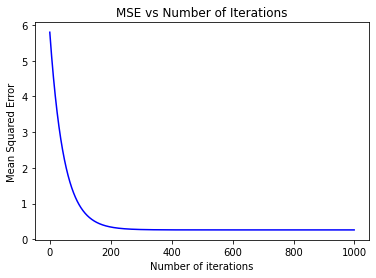

In [37]:
iter = [i for i in range(len(error))]
plt.figure()
plt.plot(iter,error,'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Number of Iterations')
plt.show()

We see that there is a uniform decrease in the error value which shows that our Algorithm is definetely working.

Now lets get the required output.

In [38]:
output = Model.predict(X_test)

In [39]:
output

array([ 3.61687481e+04,  3.32885288e+04,  9.54202259e+03,  3.16742893e+04,
        3.87953197e+04,  3.83892084e+03,  3.16063776e+04,  1.35820276e+04,
        3.52039531e+04,  3.13488590e+04,  9.42915814e+02,  3.18679174e+04,
        3.58707197e+04,  3.16231913e+03,  1.49462848e+04,  1.20456077e+04,
        1.26033278e+04,  2.34049845e+04,  7.94256054e+03,  2.82280346e+04,
        3.55084734e+04,  8.87886615e+03,  3.02053334e+03,  4.52328271e+03,
       -7.47807351e+01,  2.76308928e+03,  2.66508275e+04,  4.94532118e+03,
        4.58115642e+03,  2.60894585e+04,  3.01819340e+04,  7.07537710e-01,
        4.09575624e+03,  2.22405616e+03,  2.70648196e+04,  1.44866506e+03,
        1.59855642e+04,  1.21506773e+04,  3.04382382e+04,  2.63370726e+03,
        4.26257342e+03,  3.51718984e+04,  4.09535047e+03,  3.39884151e+04,
        8.08093043e+03,  4.69824624e+03,  3.78878960e+04,  3.34952769e+04,
        9.50293901e+03, -1.12001362e+03,  1.07493038e+04,  3.08767454e+04,
        3.97845256e+03,  

We compare this with the true value printed below.

In [40]:
Y_test

array([42303.69215 , 39774.2763  ,  8516.829   , 39611.7577  ,
       47291.055   ,  1629.8335  , 37607.5277  , 11289.10925 ,
       41097.16175 , 21472.4788  ,  2196.4732  , 21771.3423  ,
       26926.5144  ,  3279.86855 , 13224.05705 , 10797.3362  ,
       11881.9696  , 20167.33603 ,  4670.64    , 17663.1442  ,
       26109.32905 ,  9361.3268  , 16586.49771 ,  1633.0444  ,
        1121.8739  ,  1877.9294  , 16115.3045  ,  6640.54485 ,
        2404.7338  , 15006.57945 , 19361.9988  ,  1702.4553  ,
        1674.6323  , 13126.67745 , 33907.548   ,  1743.214   ,
       13470.8044  ,  9583.8933  , 18767.7377  ,  1748.774   ,
        1631.8212  , 24869.8368  ,  1981.5819  , 23807.2406  ,
        4518.82625 ,  6877.9801  , 60021.39897 , 24520.264   ,
        7050.0213  ,  1241.565   ,  7443.64305 , 19798.05455 ,
        4719.52405 ,  4433.3877  ,  3847.674   ,  7222.78625 ,
        6082.405   ,  9704.66805 ,  4441.21315 ,  5209.57885 ,
       13430.265   ,  4032.2407  ,  4438.2634  ,  5926.

We see that there is a comparable difference between the predicted and true output and this was very much expected because the given dataset had a lot of columns which had discreet values and not ones with a continuous range. For such columns, it is very clearly understood that Linear Regression is not the best algorithm in terms of efficiency and a more Classification type algorithm would have been much more suitable.

The optimal value of the learning rate and the number of iterations can be toggled around for the best output.